# `Microstripline` object in `structure` module. 

## Analytical modeling of Microstripline in Scikit-microwave-design.

In this file, we show how `scikit-microwave-design` library can be used to implement and analyze basic microstrip line structures. 

### Defining a microstrip line in `skmd`

There are two ways in which we can define a microstrip line (msl). 
1. We define the msl width. And then compute its characteristic impedance in the analytical formulation.
2. We define the characteristic impedance of the msl, and then compute the physical dimension that gives the desired characteristic impedance. 

In both the methods, the effective dielectric constant becomes a function of the msl width - in addition to the substrate thickness and substrate dielectric constant. And since the effective dielectric constant is one of the determining factors in the propagation constant, the propagation constant is also dependent on the characteristics impedance indirectly. 


In `skmd` you can define a microstrip line by both the methods. 

In [9]:
import numpy as np
import skmd as md

import matplotlib.pyplot as plt

### Define frequency 
pts_freq = 1000
freq = np.linspace(1e9,3e9,pts_freq)
omega = 2*np.pi*freq



#### define substrate
epsilon_r = 10.8 # dielectric constant or the effective dielectric constant
h_subs = 1.27*md.MILLI # meters. 



### 1. Defining msl with characteristic impedance. 

In [10]:
msl1 = md.structure.Microstripline(er=epsilon_r,h=h_subs,Z0=93,text_tag='Line-abc')


 Defining  Line-abc
Line-abc defined with Z0


`Microstripline` object is defined in the `structure` module of the `skmd` librayr. With the above command, we have defined a _msl_ by giving the characteristic impedance $Z_0$ with a text identifier 'Line-abc'. The library will compute the required line width to achieve the desired characteristic impedance for the given values of substrate thickness and dielectric constant. Therefore this code can also be used to get the design parameters for desired specifications. 

The computed width of the microstrip line is stored in the attribute `w` of the `Microstripline` object, and can be displayed by print(msl1.w). The units are in meters. You can also print all the specifications by `msl1.print_specs()`.

In [11]:
msl1.print_specs()

--------- Line-abc Specifications---------
-----Substrate-----
Epsilon_r 10.8
substrate thickness 0.00127
-------------------
line width W= 0.00019296747453793648
Characteristics impedance= 93
Length of the line =  1
Effective dielectric constant er_eff =  6.555924417931664
Frequency defined ?:  False
-------------------


### 2. Defining the msl by width. 
We can also define the msl by giving the width at the time of definition. The characteristic impedance will be computed by the code in this case. 

In [12]:
msl2 = md.structure.Microstripline(er=epsilon_r,h=h_subs,w = 1.1*md.MILLI,text_tag='Line-xyz')
msl2.print_specs()

 Defining  Line-xyz
Line-xyz defined with width.
--------- Line-xyz Specifications---------
-----Substrate-----
Epsilon_r 10.8
substrate thickness 0.00127
-------------------
line width W= 0.0011
Characteristics impedance= 50.466917262179905
Length of the line =  1
Effective dielectric constant er_eff =  7.12610312997174
Frequency defined ?:  False
-------------------


At least either width or characteristic impedance must be defined, else an error will be generated. 
If both characteristic impedance and width are given, than width is used in the definitiona and characertistic impedance is computed.

### Defining frequency range and network parameters for the microstrip line. 

We can also give the frequency values at which we want to perform the analysis. When frequency values are given, the corresponding two-port microwave `network` object also gets defined for the microstrip transmission line. If the length of the transmission line is not defined, a default length of 1 meter is considered. 

The frequency can be defined at the time of `Microstripline` definition, or can be added later using the object function `fun_add_frequency(omega)`. However, it is recommended to be defined during the initial object definition itself. 

In [13]:
msl3 = md.structure.Microstripline(er=epsilon_r,h=h_subs,w = 1.1*md.MILLI,omega = omega,text_tag='Line-with-frequency')
msl3.print_specs()
# msl.

 Defining  Line-with-frequency
Line-with-frequency defined with width.
Frequency given. Network defined.
--------- Line-with-frequency Specifications---------
-----Substrate-----
Epsilon_r 10.8
substrate thickness 0.00127
-------------------
line width W= 0.0011
Characteristics impedance= 50.466917262179905
Length of the line =  1
Effective dielectric constant er_eff =  7.12610312997174
Frequency defined ?:  True
-------------------


In [14]:
msl2.print_specs()
msl2.fun_add_frequency(omega)


--------- Line-xyz Specifications---------
-----Substrate-----
Epsilon_r 10.8
substrate thickness 0.00127
-------------------
line width W= 0.0011
Characteristics impedance= 50.466917262179905
Length of the line =  1
Effective dielectric constant er_eff =  7.12610312997174
Frequency defined ?:  False
-------------------
Frequency added (override old values). Network defined.


# Microstrip-line filters. 

Designing microstrip line filters and their analytical computation becomes very simple in `scikit-microwave-design` library. Since a microwave network object is created for a microstrip-line section, it becomes a matter of few lines of coding to implement and test filters. In addition excellent plotting features available in the `plot` module of the `skmd` library make visualization of the filer response very easy. 

## Open quarter-stub filter. 

Let us design a T-shaped open stub filter, which acts as notch filter at quarter wavelength. 

If the resonant frequency is $f_0$, then the length of the open-stub corresponding to the resonant frequency will be given by,


$l_{stub} = \frac{\lambda_0}{4}$

where, 
$\lambda_0 = \frac{c}{f_0\sqrt{\epsilon_{eff}}}$

Here, note that $\epsilon_{eff}$ is the effective dielectric constant of the substrate for a given width. If the characteristic impedance - and the corresponding width - changes then the effective dielectric constant, and therefore the effective electrical length of the stub will also change. Using this library it is very easy to take care of these issues. 


For example, the library can easily compute for us the required stub-length, for a desired combination of characteristic impedance and resonant frequency. 

The following codes shows the implementation of a simple quarter-stub filter with for different values of characteristic impedances, the corresponding stub widths, and the required stub lengths to keep the resonant frequency fixed. 





In [19]:
f0 = 1.5*md.GIGA

omega0 = md.f2omega(f0)

msl_Tx1 = md.structure.Microstripline(er=epsilon_r,h=h_subs,w=1.1*md.MILLI,l=5*md.MILLI,text_tag='Left-line',omega=omega)
msl_Tx2 = md.structure.Microstripline(er=epsilon_r,h=h_subs,w=1.1*md.MILLI,l=5*md.MILLI,text_tag='Right-line',omega=omega)

msl_Tx1.print_specs()

w_stub = 1*md.MILLI

lambda_g_stub = md.structure.Microstripline(er=epsilon_r,h=h_subs,w=w_stub,text_tag='stub-resonant-length',omega=omega0).lambda_g



w_stub = 1*md.MILLI

L_stub = lambda_g_stub/4

msl_stub = md.structure.Microstripline(er=epsilon_r,h=h_subs,w=w_stub,l=L_stub,text_tag='stub',omega=omega)

def define_NW_for_stub(msl_stub,ZL_stub):
	Y_stub = msl_stub.NW.input_admittance(1/ZL_stub)
	NW_stub = md.network.from_shunt_Y(Y_stub)
	return NW_stub
	

ZL_stub = md.OPEN
NW_stub = md.network.from_shunt_Y(msl_stub.NW.input_admittance(1/ZL_stub))




NW_filter = msl_Tx1.NW*NW_stub*msl_Tx2.NW

 Defining  Left-line
Left-line defined with width.
Frequency given. Network defined.
 Defining  Right-line
Right-line defined with width.
Frequency given. Network defined.
--------- Left-line Specifications---------
-----Substrate-----
Epsilon_r 10.8
substrate thickness 0.00127
-------------------
line width W= 0.0011
Characteristics impedance= 50.466917262179905
Length of the line =  0.005
Effective dielectric constant er_eff =  7.12610312997174
Frequency defined ?:  True
-------------------
 Defining  stub-resonant-length
stub-resonant-length defined with width.
Frequency given. Network defined.
 Defining  stub
stub defined with width.
Frequency given. Network defined.


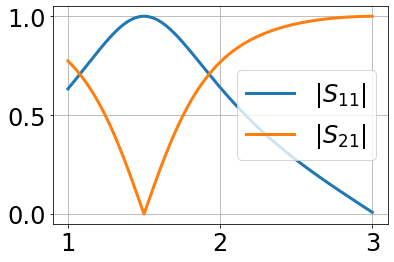

In [20]:
## Plot commands

fig1 = plt.figure('LPF')
ax1_f1 = fig1.add_subplot(111)
ax1_f1.plot(omega/(2*np.pi*md.GIGA),np.abs(NW_filter.S11),linewidth='3',label='$|S_{11}|$')
ax1_f1.plot(omega/(2*np.pi*md.GIGA),np.abs(NW_filter.S21),linewidth='3',label='$|S_{21}|$')
ax1_f1.grid(1)

ax1_f1.legend()

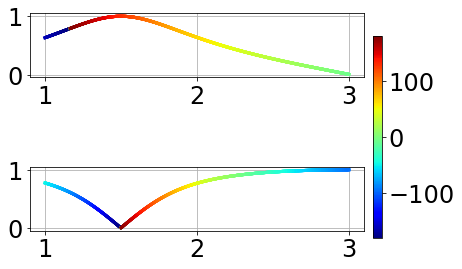

In [22]:
fig2 = plt.figure('LPF-mag-phase')
ax1_f2 = fig2.add_subplot(311)
ax1_cmap_f2 = fig2.add_axes([0.92, 0.1, 0.02, 0.7])
ax2_f2 = fig2.add_subplot(313)

md.plot.plot_colored_line(md.omega2f(omega)/md.GIGA,np.abs(NW_filter.S11),np.angle(NW_filter.S11)*180/np.pi,ax=ax1_f2,color_axis = ax1_cmap_f2)
md.plot.plot_colored_line(md.omega2f(omega)/md.GIGA,np.abs(NW_filter.S21),np.angle(NW_filter.S21)*180/np.pi,ax=ax2_f2)

ax1_f2.grid(1)
ax2_f2.grid(1)

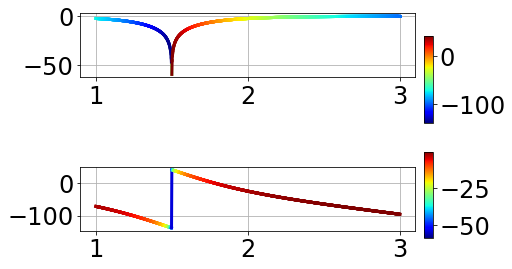

In [24]:
fig3 = plt.figure('LPF-mag-phase-dB')
ax1_f3 = fig3.add_subplot(311)
ax1_cmap_f3 = fig3.add_axes([0.92, 0.5, 0.02, 0.3])
ax2_f3 = fig3.add_subplot(313)
ax2_cmap_f3 = fig3.add_axes([0.92, 0.1, 0.02, 0.3])

md.plot.plot_colored_line(md.omega2f(omega)/md.GIGA,md.dB_mag(NW_filter.S21),np.angle(NW_filter.S21)*180/np.pi,ax=ax1_f3,color_axis = ax1_cmap_f3)
md.plot.plot_colored_line(md.omega2f(omega)/md.GIGA,np.rad2deg(np.angle(NW_filter.S21)),md.dB_mag(NW_filter.S21),ax=ax2_f3,color_axis = ax2_cmap_f3)

ax1_f3.grid(1)
ax2_f3.grid(1)

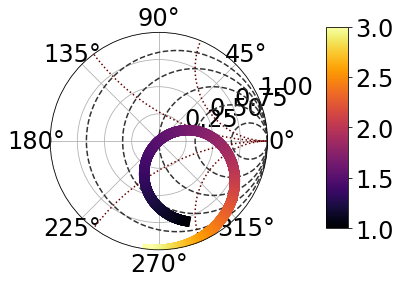

In [27]:
fig4 = plt.figure('Smith-chart')


ax1_f4 = md.plot.plot_smith_chart(md.omega2f(omega)/md.GIGA,NW_filter.S21,fig4,use_colormap='inferno',linewidth=10)
# ax1_f4 = md.plot.plot_smith_chart(md.omega2f(omega)/md.GIGA,NW_filter.S11,fig4,use_colormap='inferno',linewidth=10)

# snap_cursor_2 = md.plot.SnaptoCursor_polar(ax1_f4,md.omega2f(omega), NW_filter.S21)
# fig4.canvas.mpl_connect('motion_notify_event', snap_cursor_2.mouse_move)